<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw_exact_sample_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
'''======
run once, then comment it off, and run again
========'''
!git clone https://github.com/hechen2020/19ma573HuixinChen.git

Cloning into '19ma573HuixinChen'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 279 (delta 33), reused 0 (delta 0), pack-reused 176
Receiving objects: 100% (279/279), 519.26 KiB | 16.23 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [73]:
cd ./19ma573HuixinChen/src/

/content/19ma573HuixinChen/src/19ma573HuixinChen/src


In [0]:
from contract_v01 import VanillaOption
from sde_1d_v01 import Gbm_1d

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import array
from scipy.stats.mstats import gmean

In [0]:
#define a function of BM path generator
def BM_gen(T1, T2, n): #para: start time, end time, and the mesh number
  t = np.linspace(T1, T2, num = n+1) #init mesh
  W = np.zeros(n+1) #init BM
  #Run (3.2)
  for i in range(n):
    W[i+1] = W[i] + 1./np.sqrt(n) * np.random.normal()
    
  return t, W

mean is 0.033666934253675306 Variance is 0.9793323067955958


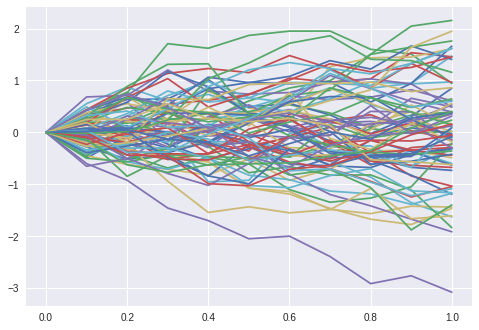

In [77]:
#test BM_gen and plot
#Also compute average and variance of $W(n)$
MeshN = 10;
SimN = 80; #Mesh number and simulation number
SumW = 0;
SqsumW = 0 #init sum of $W(n)$ and sum of $W^2(n)$
for i in range(SimN):
  [t,W] = BM_gen(0., 1., MeshN)
  SumW += W[MeshN]; SqsumW += np.square(W[MeshN])
  
  plt.plot(t, W);
  
MeanW = SumW/SimN; VarW = SqsumW/SimN - MeanW**2
print("mean is", MeanW, "Variance is", VarW)

In [0]:
def bsm_arithmetic_asian_exact_sample(self,
                                      otype = 1,
                                      strike = 110.,
                                      maturity = 1,
                                      num_step = 4,
                                      num_path = 10
                                     ):
  s0 = self.init_state
  sigma = self.vol_ratio
  r = self.drift_ratio
  
  k = strike
  T = maturity
  m = num_step
  p = num_path
  h = T/m


  arr_pr = array.array('f',[])
  for i in range(p):#we want the path and price for each simulation
    [t, S] = [BM_gen(0, T, m)[0],s0*np.exp((r-0.5*sigma**2)*h+sigma*BM_gen(0, T, m)[1])]
    plt.plot(t,S);
    
    pr = np.maximum(0, otype*(np.mean(S)-k))*np.exp(-r*T)
    arr_pr.append(pr)
    
  
  return arr_pr
 
Gbm_1d.bsm_arithmetic_asian_exact_sample = bsm_arithmetic_asian_exact_sample

The call prices are array('f', [5.357752323150635, 0.0, 0.0, 0.0, 0.0, 0.0, 4.602466583251953, 11.605244636535645, 0.0, 2.423661708831787, 17.21813201904297, 0.0, 0.0, 0.0, 25.381258010864258, 0.0, 0.0, 0.0, 0.0, 0.0, 9.996906280517578, 0.7112564444541931, 0.0, 0.0, 0.0, 13.725774765014648, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.132379412651062, 0.0, 0.0, 0.0, 0.0, 0.0, 15.772538185119629, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.791132926940918, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.819952011108398, 0.0, 0.0, 2.2273290157318115, 0.0, 0.0, 9.823942184448242, 0.0, 5.442079544067383, 0.0, 0.0, 0.0, 5.021664142608643, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.657915115356445, 11.310075759887695, 0.5011382699012756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


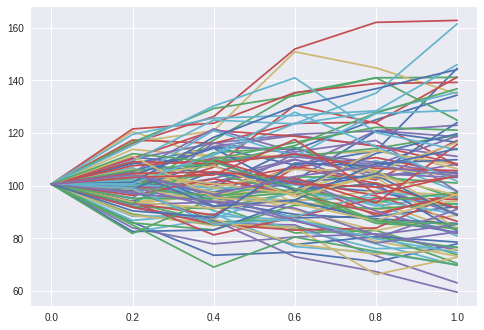

In [79]:
gbm1 = Gbm_1d(init_state=100.0, drift_ratio=0.0475, vol_ratio=0.20)
K = 110.0
T = 1.
otype = 1 #call for 1, put for -1
num_step = 5
num_path = 100

arith_asian_call = gbm1.bsm_arithmetic_asian_exact_sample(otype, K, T, num_step, 100)
print('The call prices are ' + str(arith_asian_call))

geometric asian option

In [0]:
def bsm_geometric_asian_exact_sample(self,
                                      otype = 1,
                                      strike = 110.,
                                      maturity = 1,
                                      num_step = 4,
                                      num_path = 10
                                     ):
  s0 = self.init_state
  sigma = self.vol_ratio
  r = self.drift_ratio
  
  k = strike
  T = maturity
  m = num_step
  p = num_path
  h = T/m


  arr_pr = array.array('f',[])
  for i in range(p):#we want the path and price for each simulation
    [t, S] = [BM_gen(0, T, m)[0],s0*np.exp((r-0.5*sigma**2)*h+sigma*BM_gen(0, T, m)[1])]
    plt.plot(t,S);
    
    pr = np.maximum(0, otype*(gmean(S)-k))*np.exp(-r*T)
    arr_pr.append(pr)
    
  
  return arr_pr
 
Gbm_1d.bsm_geometric_asian_exact_sample = bsm_geometric_asian_exact_sample

The call prices are array('f', [10.77463436126709, 0.0, 1.9267011880874634, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.285282135009766, 0.0, 0.0, 1.9770359992980957, 0.0, 0.6656202077865601, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.172787189483643, 0.0, 0.0, 0.0, 12.048761367797852, 0.0, 20.5618953704834, 0.0, 0.0, 3.1415724754333496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31.40808868408203, 0.0, 0.0, 23.6562557220459, 0.0, 7.367329120635986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.059422731399536, 0.0, 0.0, 0.0, 10.191712379455566, 0.0, 0.0, 0.0, 0.0, 2.5876917839050293, 0.0, 0.0, 20.416135787963867, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


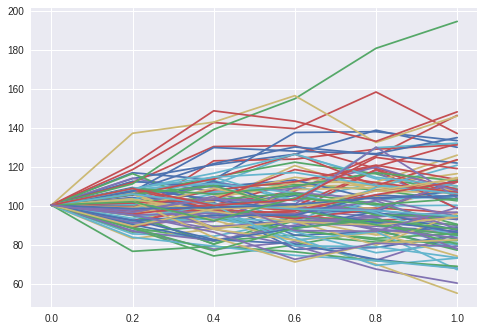

In [81]:
geo_asian_call = gbm1.bsm_geometric_asian_exact_sample(otype, K, T, num_step, 100)
print('The call prices are ' + str(geo_asian_call))

european option

In [0]:
def bsm_european_exact_sample(self,
                                      otype = 1,
                                      strike = 110.,
                                      maturity = 1,
                                      num_step = 4,
                                      num_path = 10
                                     ):
  s0 = self.init_state
  sigma = self.vol_ratio
  r = self.drift_ratio
  
  k = strike
  T = maturity
  m = num_step
  p = num_path
  h = T/m


  arr_pr = array.array('f',[])
  for i in range(p):#we want the path and price for each simulation
    [t, S] = [BM_gen(0, T, m)[0],s0*np.exp((r-0.5*sigma**2)*h+sigma*BM_gen(0, T, m)[1])]
    plt.plot(t,S);
    
    pr = np.maximum(0, otype*(S[m]-k))*np.exp(-r*T)
    arr_pr.append(pr)
    
  
  return arr_pr
 
Gbm_1d.bsm_european_exact_sample = bsm_european_exact_sample

The call prices are array('f', [0.0, 0.0, 0.0, 0.0, 0.810332179069519, 0.0, 14.861834526062012, 0.0, 0.0, 0.0, 13.925223350524902, 6.08703088760376, 10.319028854370117, 11.328659057617188, 0.0, 0.0, 0.0, 0.0, 0.0, 5.8494873046875, 9.579263687133789, 0.0, 0.0, 0.0, 0.0, 0.0, 19.999536514282227, 0.0, 22.11117172241211, 16.299530029296875, 0.0, 35.82949447631836, 4.99857759475708, 0.0, 14.210161209106445, 11.202046394348145, 4.5334577560424805, 0.0, 1.1248950958251953, 0.0, 0.0, 3.904290199279785, 15.506429672241211, 0.0, 8.6733980178833, 0.0, 1.4707276821136475, 0.0, 0.0, 42.875431060791016, 26.93313217163086, 0.0, 0.0, 0.0, 0.0, 17.928998947143555, 0.0, 8.863618850708008, 0.0, 0.0, 0.0, 0.3880036771297455, 13.121356964111328, 0.0, 13.095383644104004, 22.021930694580078, 10.717989921569824, 11.621604919433594, 0.0, 0.0, 0.0, 0.0, 12.472845077514648, 10.94267463684082, 22.587177276611328, 0.0, 5.279378414154053, 0.0, 0.0, 0.0, 11.12220573425293, 0.0, 0.0, 0.0, 33.951663970947266, 0.0, 5.3

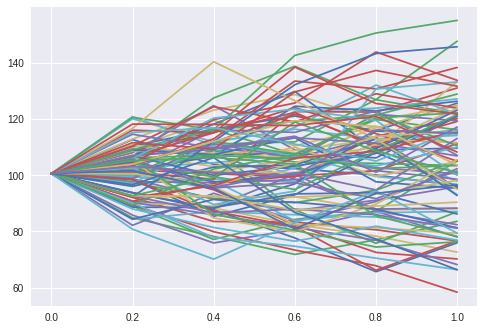

In [83]:
european_call = gbm1.bsm_european_exact_sample(otype, K, T, num_step, 100)
print('The call prices are ' + str(european_call))

comparison

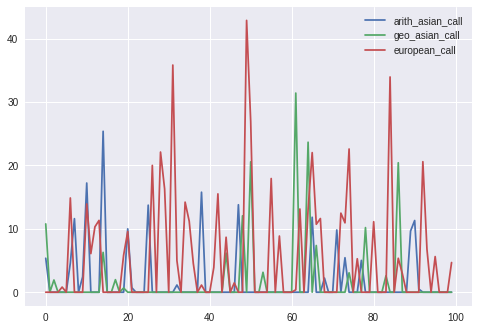

In [84]:
x = np.arange(100)

plt.plot(x, arith_asian_call)
plt.plot(x, geo_asian_call)
plt.plot(x, european_call)

plt.legend(['arith_asian_call', 'geo_asian_call', 'european_call'], loc='upper right')

plt.show()



In [87]:
ga_avg = np.mean(geo_asian_call)
aa_avg = np.mean(arith_asian_call)
e_avg = np.mean(european_call)
print(ga_avg)
print(aa_avg)
print(e_avg)

1.6224092
1.7752261
5.424831


conclusion:

$$GeoAsian<ArithAsian<Euro$$